# Fuzzy logic

## Fuzzy controler

In [1]:
%matplotlib inline
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl

distance = ctrl.Antecedent(np.arange(0,55,5), 'distance')
life = ctrl.Antecedent(np.arange(0,85,5), 'life')
action = ctrl.Consequent(np.arange(0,3,1), 'action')
action['blink'] = fuzz.trimf(action.universe, [0,0,0])
action['run'] = fuzz.trimf(action.universe, [1,1,1])
action['attack'] = fuzz.trimf(action.universe, [2,2,2])

distance.automf(3)
life.automf(3)

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


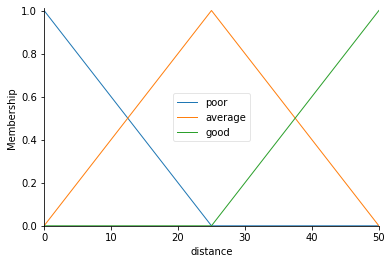

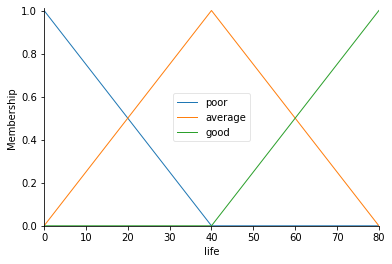

In [2]:
distance.view()
life.view()

## Fuzzy rules

Rule 1 : if life is poor and distance is poor then run

Rule 2 : if life is poor and distance is average then run

Rule 3 : if life is poor and istance is good then attack


Rule 4 : if life is average and distance is poor then run

Rule 5 : if life is average and distance is average then run

Rule 6 : if life is average and distance is good then attack


Rule 7 : if life is good and distance is poor then attack

Rule 8 : if life is good and distance is average then attack

Rule 9 : if life is good and distance is good then attack

In [3]:
rule1 = ctrl.Rule(life['poor'] & distance['poor'], action['blink'])
rule2 = ctrl.Rule(life['poor'] & distance['average'], action['run'])
rule3 = ctrl.Rule(life['poor'] & distance['good'], action['attack'])
rule4 = ctrl.Rule(life['average'] & distance['poor'], action['run'])
rule5 = ctrl.Rule(life['average'] & distance['average'], action['run'])
rule6 = ctrl.Rule(life['average'] & distance['good'], action['attack'])
rule7 = ctrl.Rule(life['good'] & distance['poor'], action['attack'])
rule8 = ctrl.Rule(life['good'] & distance['average'], action['attack'])
rule9 = ctrl.Rule(life['good'] & distance['good'], action['attack'])

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d05a993648>)

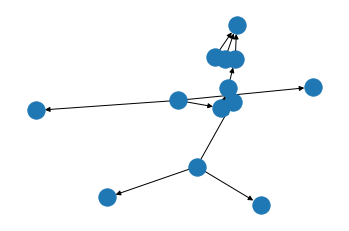

In [4]:
rule1.view()

## Control system creation and simulation

In [5]:
action_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

In [6]:
action_simulation = ctrl.ControlSystemSimulation(action_ctrl)

0.7033333333333333


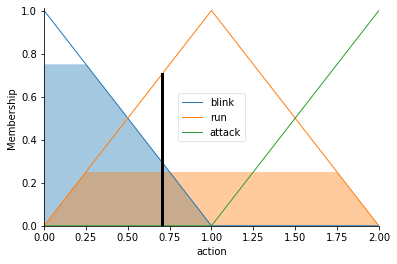

In [7]:
action_simulation.input['life'] = 10
action_simulation.input['distance'] = 5

action_simulation.compute()
print(action_simulation.output['action'])
action.view(sim=action_simulation)

With life = 73 and distance = 23.4, the fuzzy controler tells us to attack

1.611111111111111


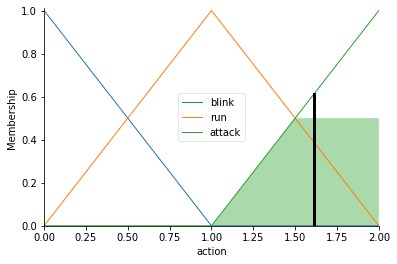

In [8]:
action_simulation.input['life'] = 20
action_simulation.input['distance'] = 100

action_simulation.compute()
print(action_simulation.output['action'])
action.view(sim=action_simulation)

With life = 20 and distance = 23.4 the fuzzy controler tells us to run